In [1]:
from hml.generators import Madgraph5
from hml.observables import get_observable
from hml.representations import Set
from hml.datasets import TabularDataset
from hml.utils import Filter
from keras.utils import Progbar
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/02


In [2]:
zjj = Madgraph5.from_output("./data/pp2zz_z2jj_z2vlvl")
qcd = Madgraph5.from_output("./data/qcd")

In [5]:
preselections = Filter(["FatJet.Size > 0", "Jet.Size > 1"])

In [ ]:
zjj_set = Set(
    [
        get_observable("FatJet_0.Mass"),
        get_observable("FatJet_0.TauMN", m=2, n=1),
        get_observable("Jet_0-Jet_1.DeltaR"),
    ]
)

qcd_set = Set(
    [
        get_observable("FatJet_0.Mass"),
        get_observable("FatJet_0.TauMN", m=2, n=1),
        get_observable("Jet_0-Jet_1.DeltaR"),
    ]
)

In [6]:
zjj_bar = Progbar(zjj.runs[0].n_events)
for i, event in enumerate(zjj.runs[0].events):
    if preselections.read_event(event).passed():
        zjj_set.read_event(event)
    
    zjj_bar.update(i+1)

1000/1000 [==============================] - 1s 889us/step


In [7]:
qcd_bar = Progbar(qcd.runs[0].n_events)
for i, event in enumerate(qcd.runs[0].events):
    if preselections.read_event(event).passed():
        qcd_set.read_event(event)
    
    qcd_bar.update(i+1)

1000/1000 [==============================] - 1s 1ms/step


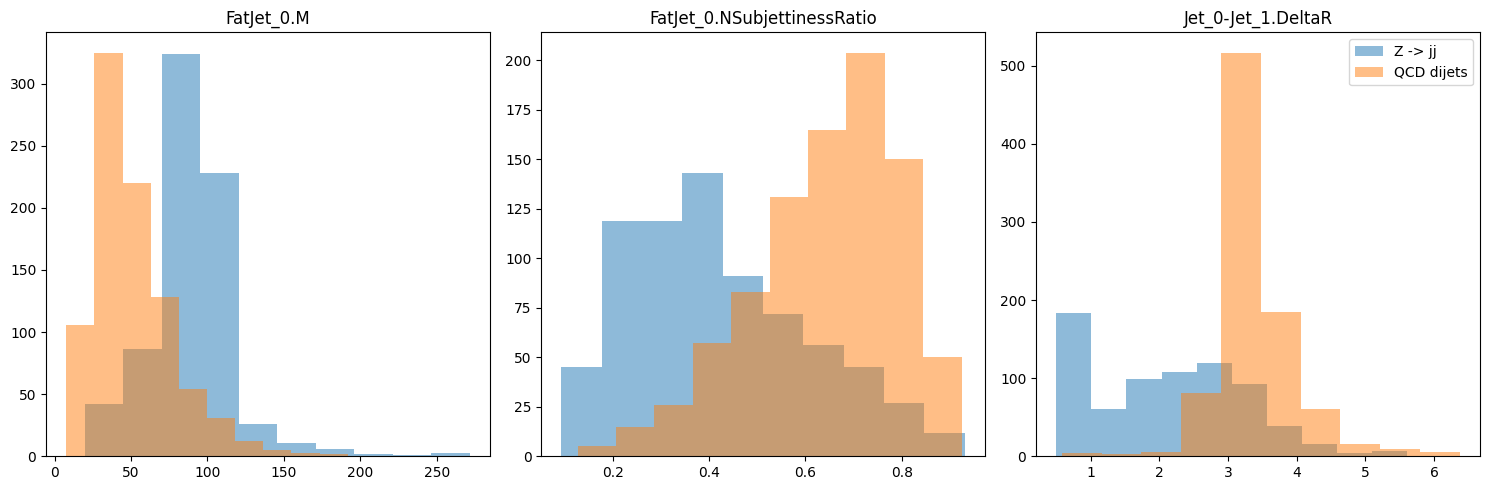

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(zjj_set.to_numpy()[:, 0], alpha=0.5, label="Z -> jj")
axs[0].hist(qcd_set.to_numpy()[:, 0], alpha=0.5, label="QCD dijets")
axs[0].set_title(zjj_set.names[0])

axs[1].hist(zjj_set.to_numpy()[:, 1], alpha=0.5, label="Z -> jj")
axs[1].hist(qcd_set.to_numpy()[:, 1], alpha=0.5, label="QCD dijets")
axs[1].set_title(zjj_set.names[1])

axs[2].hist(zjj_set.to_numpy()[:, 2], alpha=0.5, label="Z -> jj")
axs[2].hist(qcd_set.to_numpy()[:, 2], alpha=0.5, label="QCD dijets")
axs[2].set_title(zjj_set.names[2])
axs[2].legend()

plt.tight_layout()
plt.show()

In [9]:
samples = np.array(zjj_set.values + qcd_set.values, "float32")
targets = np.array([1] * len(zjj_set.values) + [0] * len(qcd_set.values), "int32")
dataset = TabularDataset(
    samples=samples,
    targets=targets,
    feature_names=zjj_set.names,
    target_names=["Z -> jj", "QCD dijets"],
    description="Z -> jj vs QCD dijets",
)

In [10]:
dataset.save("./data/zjj_vs_qcd")